In [ ]:
from SMO_svm import SVM
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# Circle Dataset

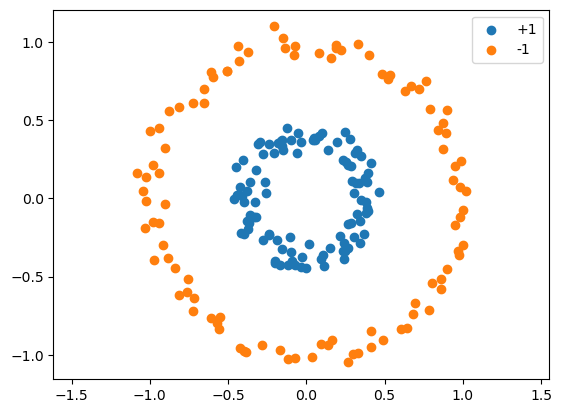

In [26]:
X, y = make_circles(n_samples=200, factor=0.4, noise=0.05)
y = np.where(y == 0, -1, 1)

plt.scatter(X[y==1, 0], X[y==1, 1], label="+1")
plt.scatter(X[y==-1, 0], X[y==-1, 1], label="-1")
plt.axis("equal")
plt.legend()
plt.show()

### Feature mapping

In [27]:
def poly_map(X):
    x1, x2 = X[:, 0], X[:, 1]
    z = 6 * (x1**2 + x2**2)
    return np.c_[x1, x2, z]

Z = poly_map(X)

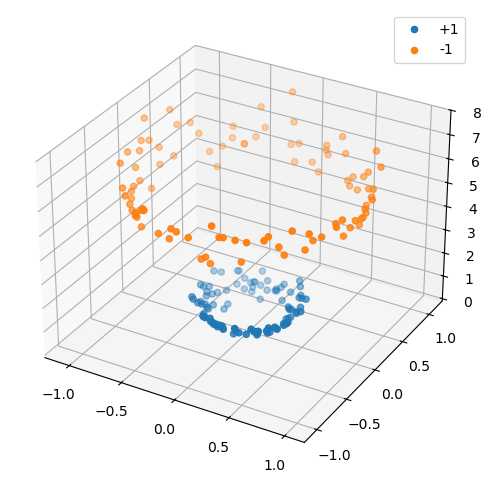

In [28]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(Z[y==1,0], Z[y==1,1], Z[y==1,2], label="+1")
ax.scatter(Z[y==-1,0], Z[y==-1,1], Z[y==-1,2], label="-1")

ax.legend()
plt.show()

### Model

In [29]:
model = SVM(kernel="linear")

model.fit(Z, y)

w = model.w
b = model.b

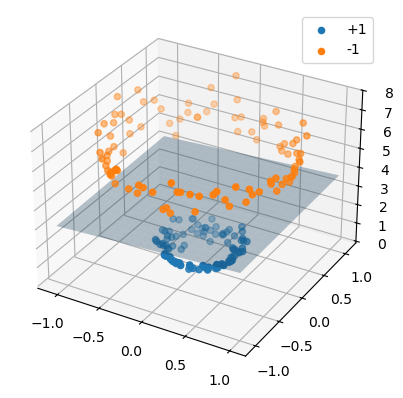

In [30]:
xx, yy = np.mgrid[
    Z[:,0].min():Z[:,0].max():20j,
    Z[:,1].min():Z[:,1].max():20j
]

zz = -(w[0]*xx + w[1]*yy + b) / w[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(Z[y==1,0], Z[y==1,1], Z[y==1,2], label="+1")
ax.scatter(Z[y==-1,0], Z[y==-1,1], Z[y==-1,2], label="-1")

ax.plot_surface(xx, yy, zz, alpha=0.3)

ax.legend()
plt.show()

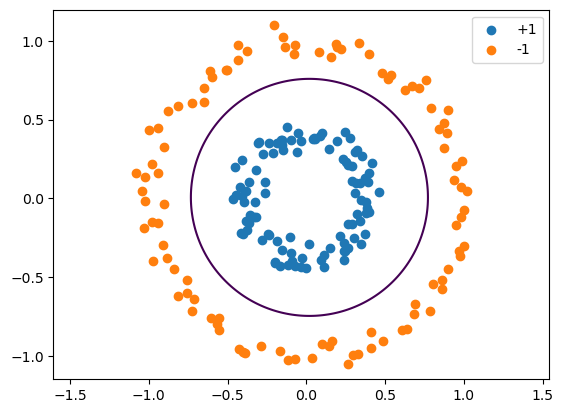

In [31]:
xx, yy = np.mgrid[
    Z[:,0].min()-0.1:Z[:,0].max()+0.1:200j,
    Z[:,1].min()-0.1:Z[:,1].max()+0.1:200j
]

grid = np.c_[xx.ravel(), yy.ravel()]
grid_z = poly_map(grid)

Z_pred = model.decision_function(grid_z).reshape(xx.shape)

plt.contour(xx, yy, Z_pred, levels=[0])
plt.scatter(X[y==1,0], X[y==1,1], label="+1")
plt.scatter(X[y==-1,0], X[y==-1,1], label="-1")

plt.axis("equal")
plt.legend()
plt.show()

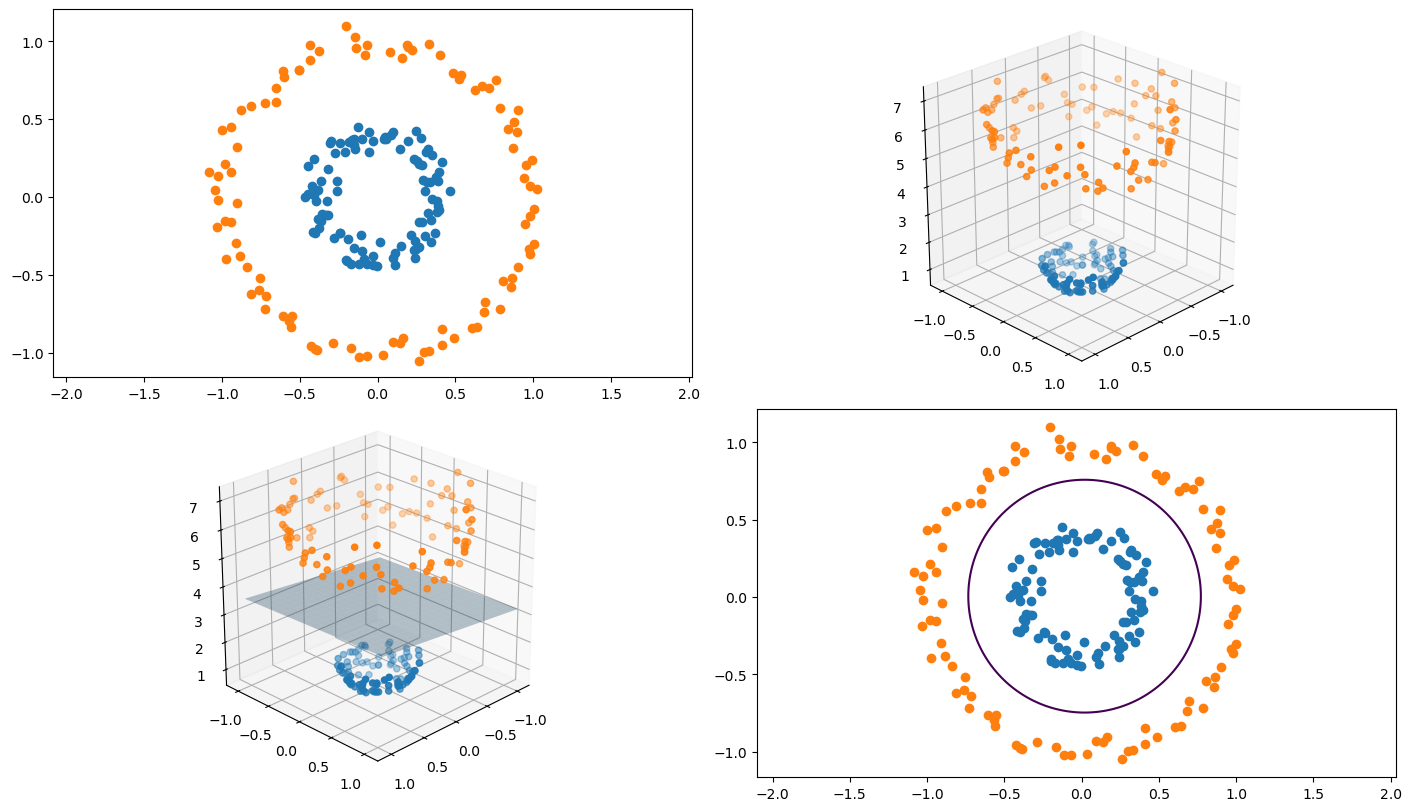

In [32]:
fig = plt.figure(figsize=(14, 8), constrained_layout=True)

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(X[y==1,0], X[y==1,1], label="+1")
ax1.scatter(X[y==-1,0], X[y==-1,1], label="-1")
ax1.axis("equal")

ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax2.scatter(Z[y==1,0], Z[y==1,1], Z[y==1,2], label="+1")
ax2.scatter(Z[y==-1,0], Z[y==-1,1], Z[y==-1,2], label="-1")
ax2.set_box_aspect([1,1,1])
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-1.2, 1.2)
ax2.set_zlim(Z[:,2].min(), Z[:,2].max())
ax2.view_init(elev=25, azim=45)

ax3 = fig.add_subplot(2, 2, 3, projection="3d")
ax3.scatter(Z[y==1,0], Z[y==1,1], Z[y==1,2])
ax3.scatter(Z[y==-1,0], Z[y==-1,1], Z[y==-1,2])

xx, yy = np.mgrid[
    Z[:,0].min():Z[:,0].max():20j,
    Z[:,1].min():Z[:,1].max():20j
]
zz = (-w[0]*xx - w[1]*yy - b) / w[2]
ax3.plot_surface(xx, yy, zz, alpha=0.3)

ax3.set_box_aspect([1,1,1])
ax3.set_xlim(-1.2, 1.2)
ax3.set_ylim(-1.2, 1.2)
ax3.set_zlim(Z[:,2].min(), Z[:,2].max())
ax3.view_init(elev=25, azim=45)

ax4 = fig.add_subplot(2, 2, 4)

xx, yy = np.mgrid[
    Z[:,0].min()-0.1:Z[:,0].max()+0.1:200j,
    Z[:,1].min()-0.1:Z[:,1].max()+0.1:200j
]
grid = np.c_[xx.ravel(), yy.ravel()]
Z_grid = poly_map(grid)

Z_pred = model.decision_function(Z_grid).reshape(xx.shape)

ax4.contour(xx, yy, Z_pred, levels=[0])
ax4.scatter(X[y==1,0], X[y==1,1])
ax4.scatter(X[y==-1,0], X[y==-1,1])
ax4.axis("equal")

plt.show()


# XOR Dataset

### My SVM

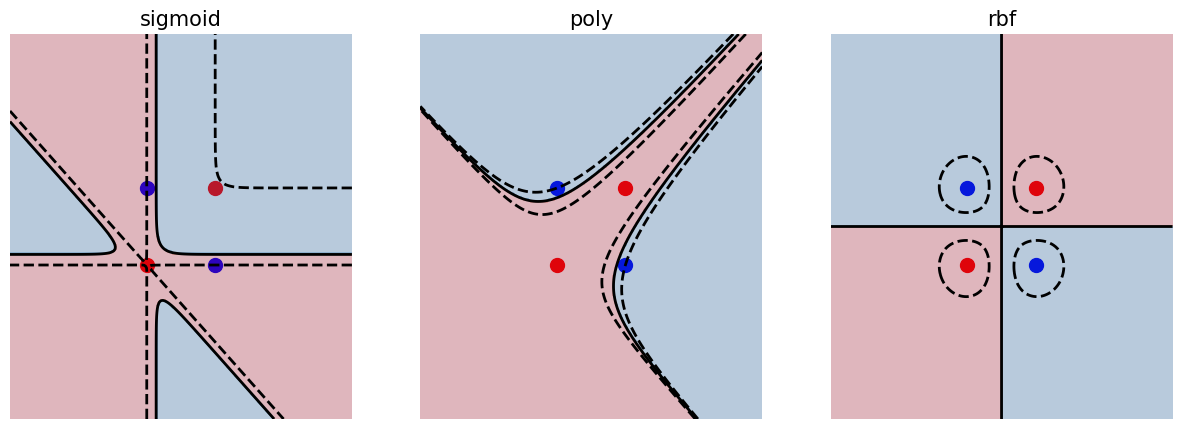

In [35]:
X = np.c_[(0, 0),
          (1, 1),
          (0, 1),
          (1, 0)].T

y = np.array([-1, -1, 1, 1])

fig = plt.figure(figsize=(15, 5))

for i, kernel in enumerate(('sigmoid', 'poly', 'rbf')):
    clf = SVM(kernel=kernel, gamma=4, coef=0)
    clf.fit(X, y)

    ax = fig.add_subplot(1, 3, i+1)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', s=100)

    x_min, x_max = -2, 3
    y_min, y_max = -2, 3
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, np.sign(Z), alpha=0.3, cmap='RdBu')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5], linewidths=2)
    
    plt.title(kernel, fontsize=15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axis('off')

plt.show()

### scikit-learn

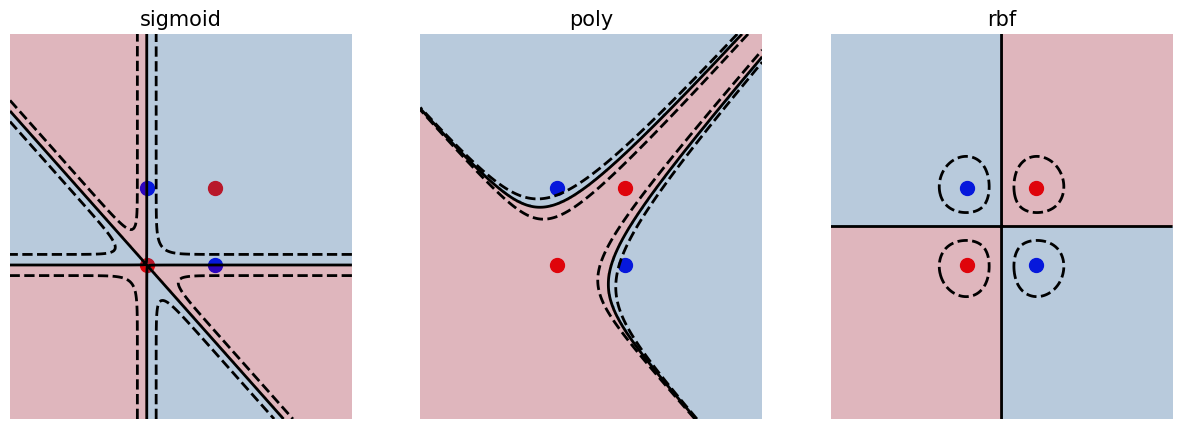

In [34]:
from sklearn.svm import SVC

X = np.c_[(0, 0),
          (1, 1),
          (0, 1),
          (1, 0)].T

y = np.array([-1, -1, 1, 1]) 

fig = plt.figure(figsize=(15, 5))

for i, kernel in enumerate(('sigmoid', 'poly', 'rbf')):
    clf = SVC(kernel=kernel, gamma=4, coef0 = 0)
    clf.fit(X, y)

    ax = fig.add_subplot(1, 3, i+1)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', s=100)

    x_min, x_max = -2, 3
    y_min, y_max = -2, 3
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, np.sign(Z), alpha=0.3, cmap='RdBu')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5], linewidths=2)
    
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axis('off')

plt.show()